<a href="https://colab.research.google.com/github/kevinbrnett/sales-predictions/blob/main/Resubmit_Project_Part_5_(sales_predictions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 2
- Kevin Barnett
- 11/17/2022


## Loading Data


In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Create dataframe and see if data loaded correctly
filename = '/content/drive/MyDrive/Coding Dojo/02 Week 2: Pandas/sales_predictions.csv'
sales_predict_df = pd.read_csv(filename)
sales_predict_df.info()
sales_predict_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Question 1: How many rows and columns are there?
- There are 12 columns and 8523 rows

## Question 2: What are the datatypes of each variable?
- 'Item_Identifier' = 'object'
- 'Item_Weight' = 'float64'
- 'Item_Fat_Content' = 'object'
- 'Item_Visibility = 'float64'
- 'Item_Type = 'object'
- 'Item_MRP' = 'float64'
- 'Outlet_Identifier' = 'object'
- 'Outlet_Establishment_Year' = 'int64'
- 'Outlet_Size' = 'object'
- 'Outlet_Location_Type' = 'object'
- 'Outlet_Type' = 'object'
- 'Item_Oulet_Sales' = 'float64'

## Data Cleaning


In [ ]:
# Check for any duplicates
sales_predict_df.duplicated().any()

False

> There is no duplicate data

In [ ]:
# The 'Outlet_Location_Type' and 'Outlet_Type' columns should give the same information, but the two don't match well. I removed the 'Outlet_Type' column as the data in 'Outlet_Location_Type' will be simpler to work with
sales_predict_df.drop(columns = 'Outlet_Type', inplace = True)
sales_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [ ]:
# Identify any missing values
sales_predict_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Item_Outlet_Sales               0
dtype: int64

- There are 1463 missing rows of data in the 'Item_Weight' column
- There are 2410 missing rows of data in the 'Outlet_Size' column

In [ ]:
# Impute the mean of item weights for missing data
sales_predict_df['Item_Weight'].fillna( value = sales_predict_df['Item_Weight'].mean(), inplace = True)
sales_predict_df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Item_Outlet_Sales               0
dtype: int64

> To resolve missing data in the 'Item_Weight' column the mean of the column was put in place for the missing values. This was done since there was no way to actually know what the item weights

In [ ]:
# Check number of unique values for the Outlet_Size column
sales_predict_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# Impute 'Medium' for missing data
sales_predict_df['Outlet_Size'].fillna(value = 'Medium', inplace = True)
sales_predict_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Item_Outlet_Sales            0
dtype: int64

> To resolve the missing data in the 'Outlet_Size' column 'Medium' was put in place for the missing data. This was done since 'Medium' was over 50% of the data in the column

In [ ]:
# Check columns for inconsistencies in data values in the 'Item_Fat_Content' column
sales_predict_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Replace 'LF', 'low fat' with 'Low Fat' and 'reg' with 'Regular' 
sales_predict_df.replace({'LF': 'Low Fat','reg': 'Regular','low fat': 'Low Fat'}, inplace = True)
sales_predict_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Check columns for inconsistencies in data values in the 'Item_Type' column
sales_predict_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
# Check columns for inconsistencies in data values in the 'Outlet_Establishment_Year' column
sales_predict_df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [ ]:
# Check columns for inconsistencies in data values in the 'Outlet_Location_Type' column
sales_predict_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

> The only column that had inconsistencies in the data was the 'Item_Fat_Content' column. The data values were replaced to make the data consistent

In [ ]:
# Display summary of the statistics for the numeric columns
sales_predict_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals


In [ ]:
# Show the information for the data frame again
sales_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [ ]:
# Create custom function that will use a for loop to create a histogram and boxplot for relevant columns
# EDA function to plot a histogram and boxplot for each column
def plot_column(sales_predict_df, col):

    # All figures will share an x axis for the histogram and boxplot
    fig, ax = plt.subplots( nrows = 2, figsize = (30, 8), sharex = True)

    # Use seaborn plots
    sns.histplot(data = sales_predict_df, x= col, ax = ax[0])
    mean_value = sales_predict_df[col].mean()
    med_value = sales_predict_df[col].median()
    ax[0].axvline(mean_value, color = 'red', ls = '--')
    ax[0].axvline(med_value, color = 'k', ls = ':', lw = 5)
    sns.boxplot(data = sales_predict_df, x= col, ax = ax[1])

    # Udapte title of visualisations
    ax[0].set_title(f'EDA for {col}', fontsize = 20)

    # Display visualizations
    plt.tight_layout()
    plt.show()

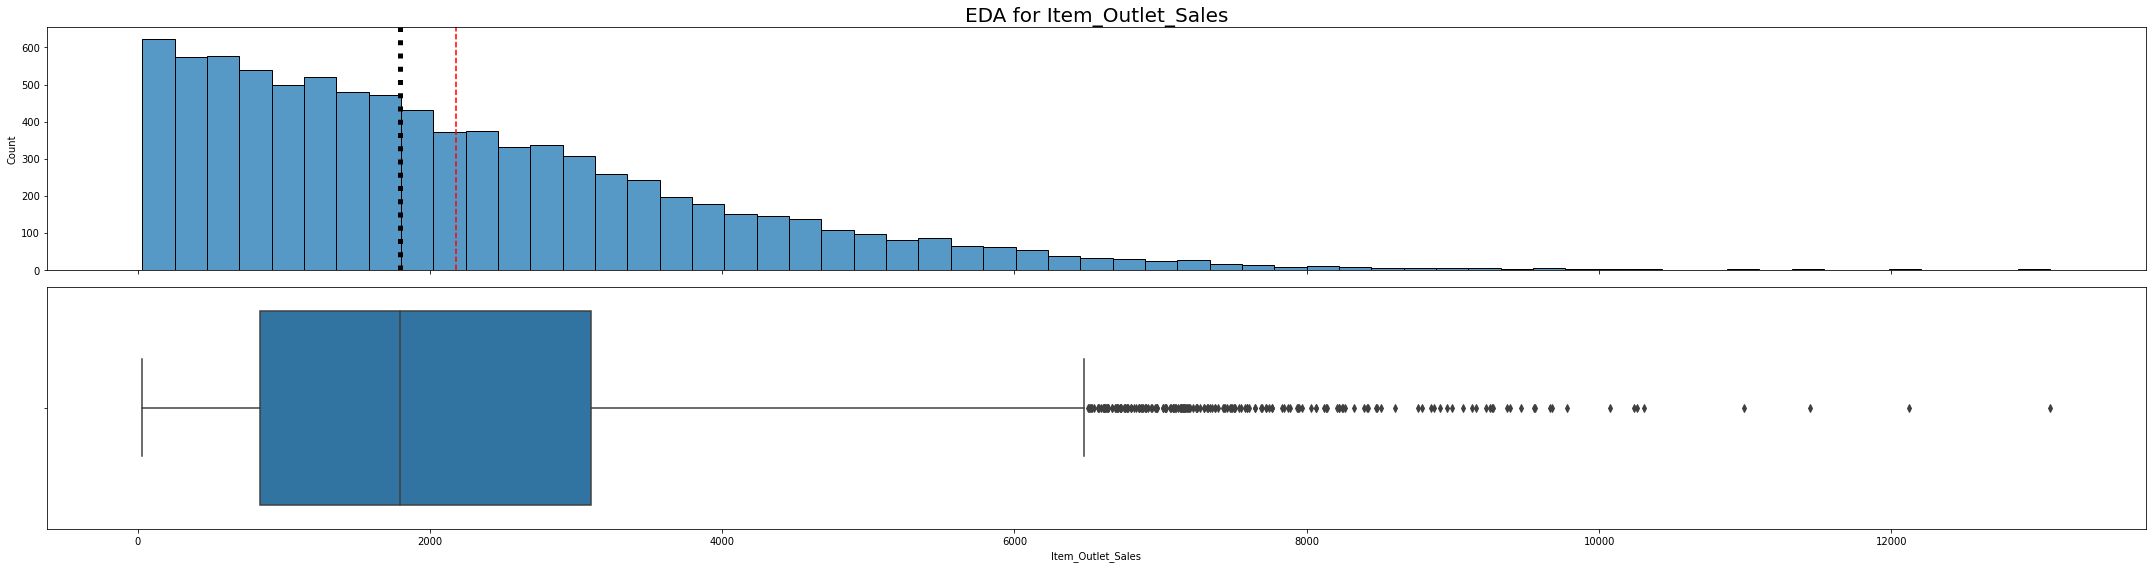

None


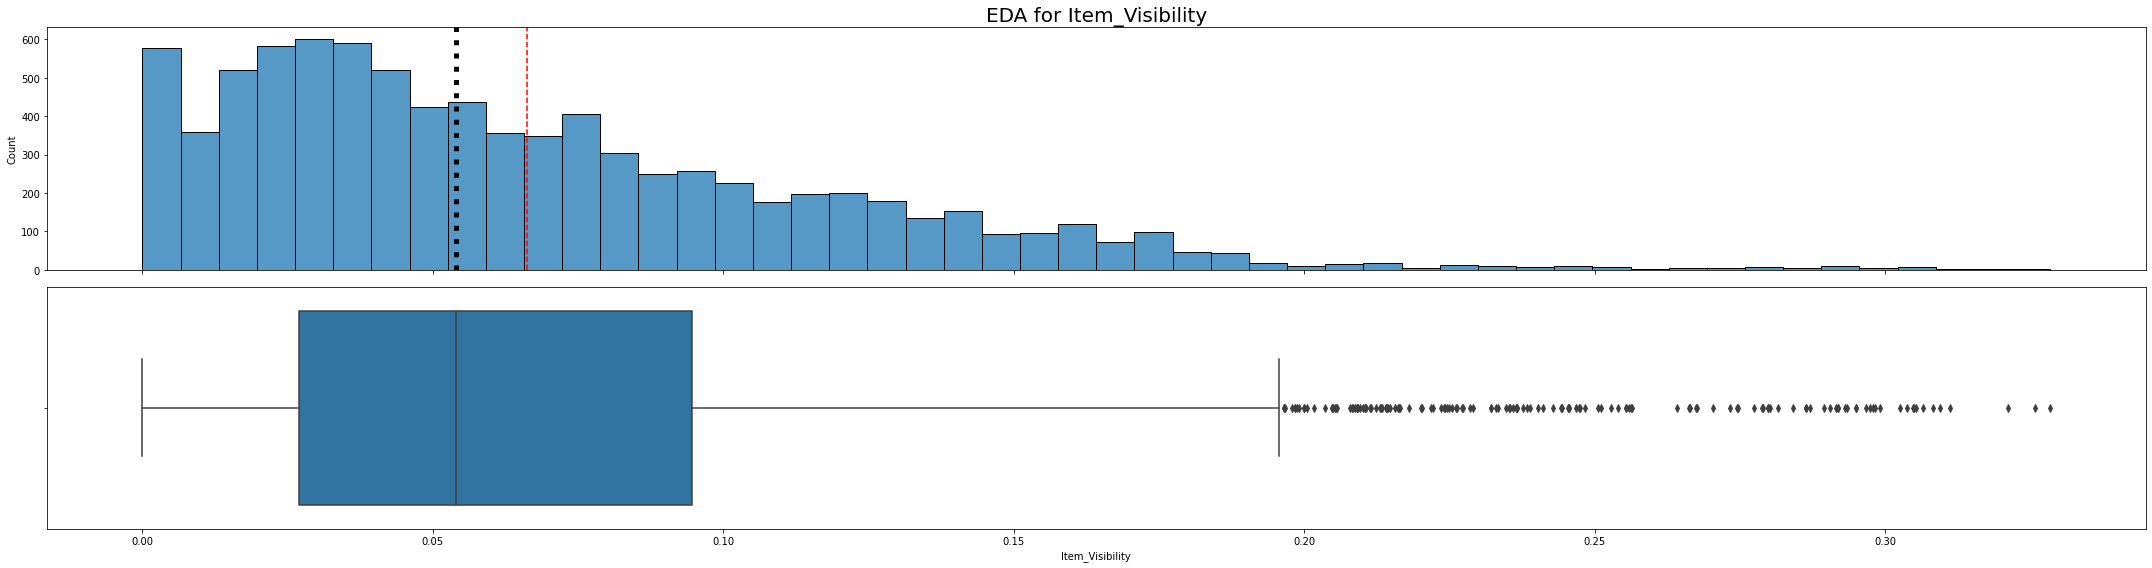

None


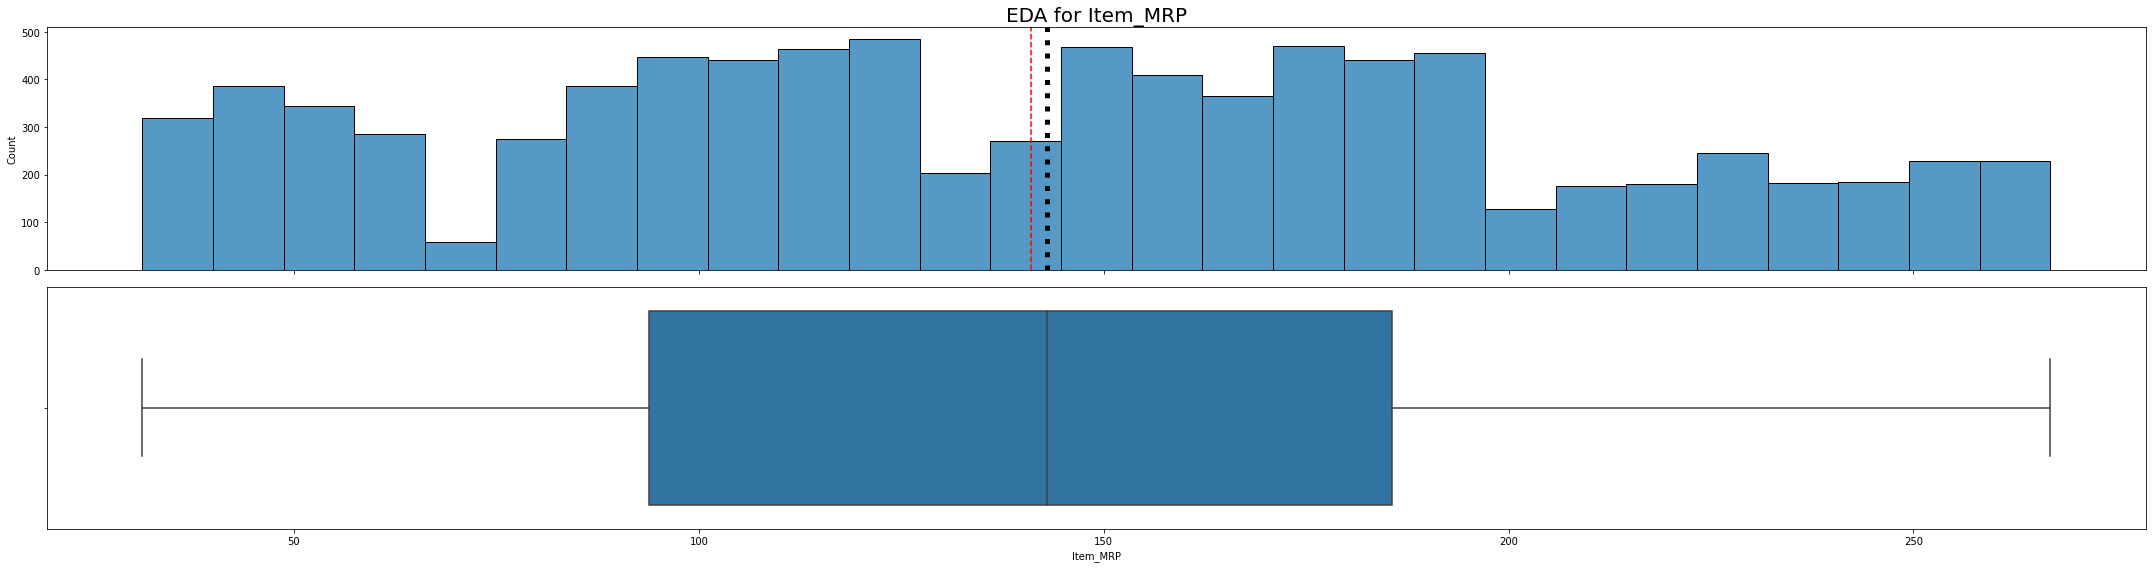

In [ ]:
print(plot_column(sales_predict_df, 'Item_Outlet_Sales'))
print(plot_column(sales_predict_df, 'Item_Visibility'))
plot_column(sales_predict_df, 'Item_MRP')

> We can see that the data for item sales and visibility are both skewed to the right. Both of these features also have a significant amount of outliers. With the item MRP feature there does not seem to be a pattern in the histogram, however the mean and median are similar suggesting a more normal distribution of data

In [ ]:
# Create custom function to create EDA with barplots for categorical frequencies
# EDA to plot barplots
def bar_plot(data, x, y, size = (12, 8)):
  fig, ax = plt.subplots(figsize = size)
  # Count up categories and sort values
  count = sales_predict_df[x].value_counts().sort_values(ascending= False).to_frame()

  # Create barplot
  sns.barplot(data = count, x = count.index, y = count[x], ax = ax)
  plt.xticks(rotation = 75)
  ax.set_title(f'Categorical Frequencies of {y}')
  ax.set_xlabel(f'Categories for {y}')
  ax.set_ylabel(f'Counts')
  plt.tight_layout()

  return fig, ax

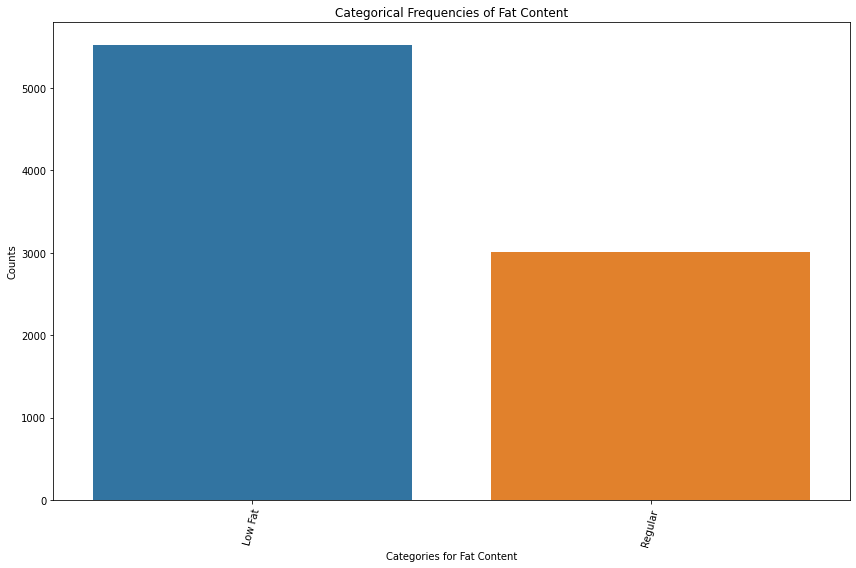

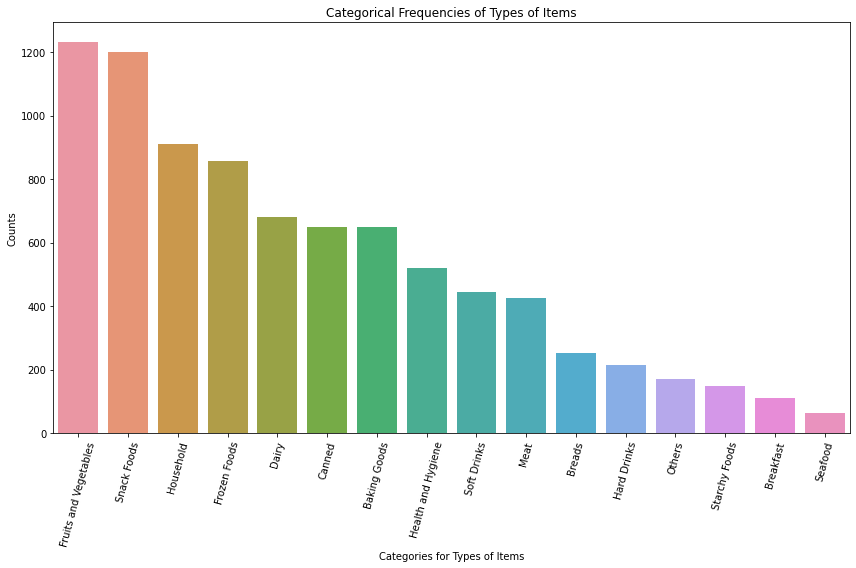

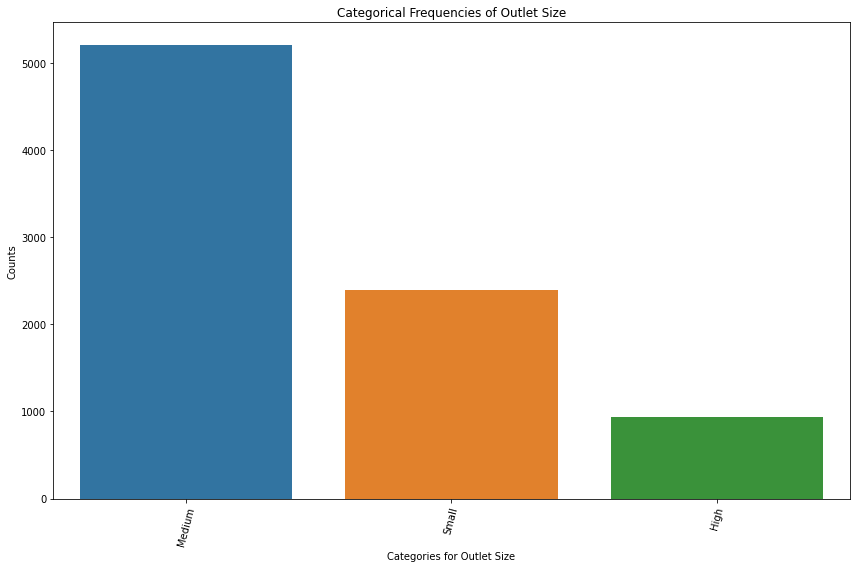

In [ ]:
fig, ax = bar_plot(sales_predict_df, 'Item_Fat_Content', 'Fat Content');
fig, ax = bar_plot(sales_predict_df, 'Item_Type', 'Types of Items');
fig, ax = bar_plot(sales_predict_df, 'Outlet_Size', 'Outlet Size');

> Across all outlets there are 50% more low fat items

> We can see that across all outlets that the top 5 food types are fruits and vegetables, snack foods, household products, frozen foods, and dairy products

> There are more medium outlets than small and large outlets combined


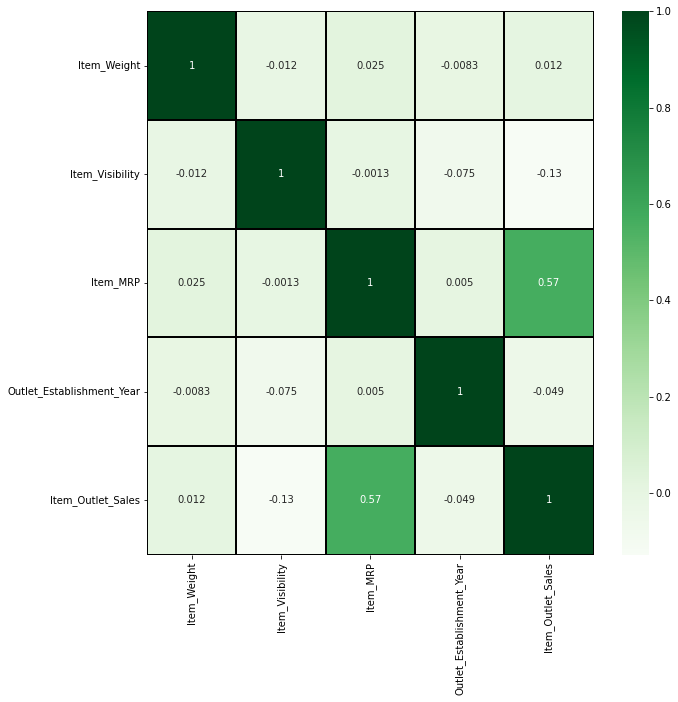

In [ ]:
# Create heatmap to compare all features for correlation
# Adjust figure size
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(sales_predict_df.corr(), annot = True, cmap = 'Greens', linewidths = 1, linecolor = 'Black');

> There seems to only be two features that are moderately correlated, item sales and MRP

## Explanatory Visuals

In [ ]:
# Get data frame infor
sales_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


## 1. Do larger outlet sizes have more sales than smaller ones?

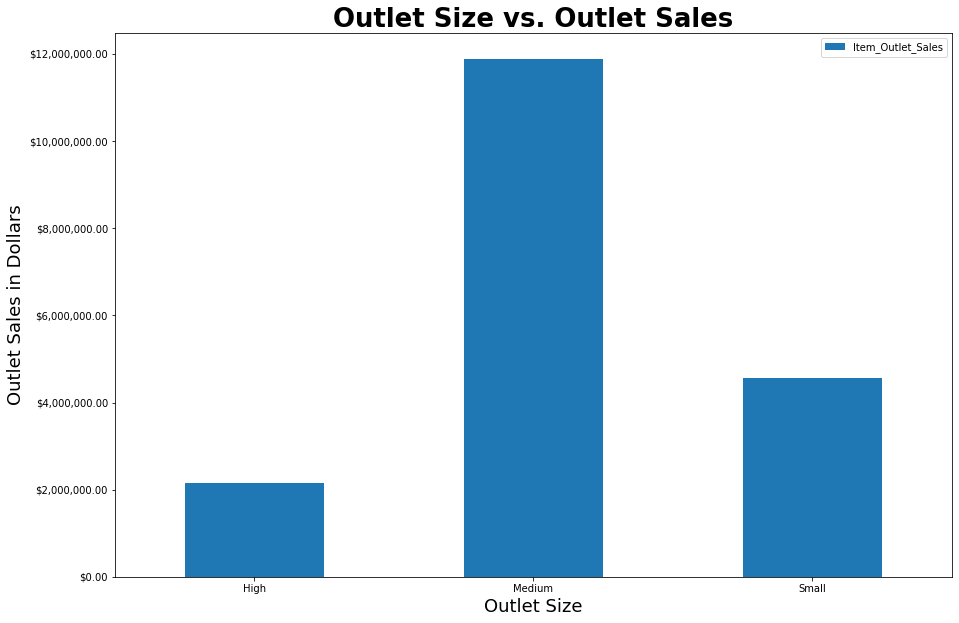

In [ ]:
# Create barplot with outlet size as the x-axis and outlet sales as the y-axis
from matplotlib.ticker import FuncFormatter

# Group each outlet size and find the sum of the item sales
fig, sum_sales = plt.subplots(figsize = (15,10))
sum_sales = sales_predict_df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().plot.bar()
sum_sales.set_title('Outlet Size vs. Outlet Sales', fontsize = 26, fontweight = 'bold')
sum_sales.set_xlabel('Outlet Size', fontsize = 18)
sum_sales.set_ylabel('Outlet Sales in Dollars', fontsize = 18)
sum_sales.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 0)

# Turn ylabels into millions of dollars
def millions(x, pos):
  return f'${x:,.2f}'

price_millions = FuncFormatter(millions)
sum_sales.yaxis.set_major_formatter(price_millions)


> We can see that medium size outlets account for a majority of sales. Another question we would now need to answer is: What is the ratio of sales per number of high, medium, and small outlets?

2. Do more recently established stores sell more items?

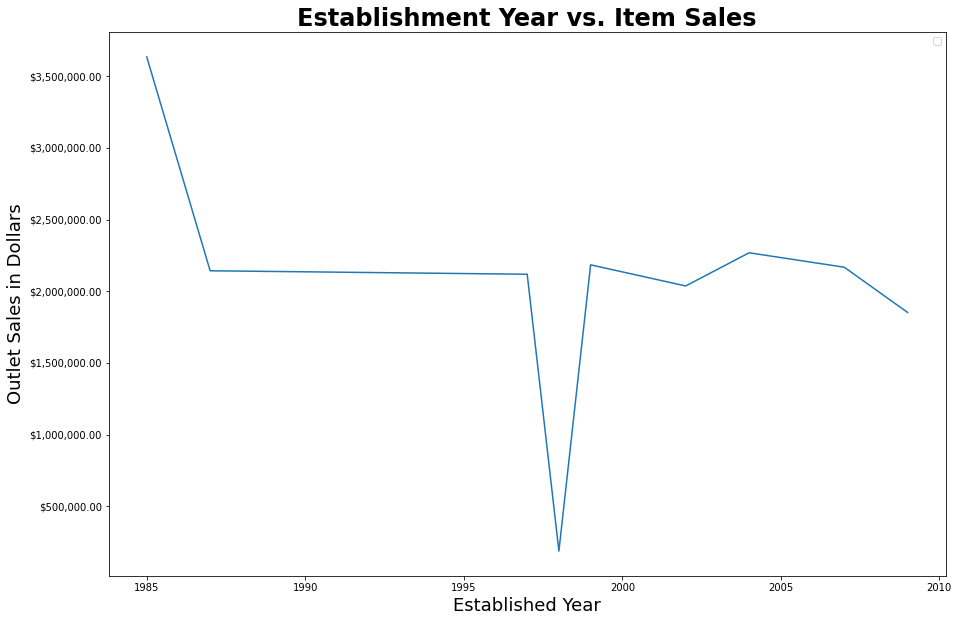

In [ ]:
# Create lineplot to show the trend of Established Year vs. Sales
fig, ax = plt.subplots(figsize = (15, 10))

data = sales_predict_df.groupby('Outlet_Establishment_Year', as_index = False)['Item_Outlet_Sales'].sum()
ax = sns.lineplot(data = data, x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales')
ax.set_title('Establishment Year vs. Item Sales', fontsize = 24, fontweight = 'bold')

ax.set_xlabel('Established Year', fontsize = 18)
ax.set_ylabel('Outlet Sales in Dollars', fontsize = 18)
ax.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 0)


# Turn ylabels into millions of dollars
def millions(x, pos):
  return f'${x:,.2f}'

price_millions = FuncFormatter(millions)
ax.yaxis.set_major_formatter(price_millions)


> This graph shows that stores that have been established more recenty earn less

# Machine Learning for Predictions

In [ ]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load uncleaned dataset to prevent data leakage
filename = ('/content/drive/MyDrive/Coding Dojo/Data Sets/sales_predictions.csv')
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


> The columns that have a potential effect on item sales are 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', and 'Outlet_Size'
### Types of Data
- Numeric: 'Item_Visibility'
- Ordinal: 'Outlet_Size'
- Nominal: 'Item_Type' and 'Item_Fat_Content'

In [ ]:
# Remove any duplicated rows
df.drop_duplicates()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
# Check categorical data for inconsistencies
print(df['Item_Fat_Content'].value_counts(),'\n')
print(df['Item_Type'].value_counts(),'\n')
df['Outlet_Size'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 



Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

> In the 'Item_Fat_Content' column, Low Fat is written three different ways (Low Fat, low fat, LF). Regular is written two diffent ways (Regular, reg). These will be changed to be consistent as the data is prepared for OneHotEncoding

In [ ]:
# Fix inconsistencies and prepare categorical data for OneHotEncoding
df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}, inplace=True);
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Replace High value with Large
df['Outlet_Size'].replace({'High':'Large'}, inplace=True)

In [ ]:
# Replace categorical values with numeric values for ordinal encoding
df['Outlet_Size'].replace({'Small':0,'Medium':1,'Large':2})

0       1.0
1       1.0
2       1.0
3       NaN
4       2.0
       ... 
8518    2.0
8519    NaN
8520    0.0
8521    1.0
8522    0.0
Name: Outlet_Size, Length: 8523, dtype: float64

In [ ]:
# Identify X features and y target
y = df['Item_Outlet_Sales']
X= df[['Item_Fat_Content','Item_Visibility','Item_Type','Outlet_Size']]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Machine Learning Pipeline

In [ ]:
# Instantiate column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [ ]:
# Instantiate transformers
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
scaler = StandardScaler()

In [ ]:
# Instantiate imputers
freq_imp = SimpleImputer(strategy='most_frequent')

In [ ]:
# Instantiate pipelines
num_pipe = make_pipeline(scaler)
cat_pipe = make_pipeline(freq_imp, ohe)

In [ ]:
# Instantiate column transformers
# Tuples
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

#ColumnTransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f88d2126bb0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f88d2126970>)])

In [ ]:
# Transform data
# Fit on training data
preprocessor.fit(X_train)

# Transform train and test data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_processed

array([[-0.71277507,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.29105225,  0.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.81331864,  0.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.92052713,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.2277552 ,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.95867683,  1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
# Inspect results
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 22)




array([[-0.71277507,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.29105225,  0.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.81331864,  0.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.92052713,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.2277552 ,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.95867683,  1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])